<a href="https://colab.research.google.com/github/2110030020/Road-Lane-Detection/blob/main/RoadLaneDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Step-1: Importing Libraries***

In [8]:
#import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

***Step-2: Reading an image***

In [42]:
'''
Read an image that consits of a road with lanes
Here we use the imread() method of opencv to read the image
'''

image = cv2.imread('Road.jpg')

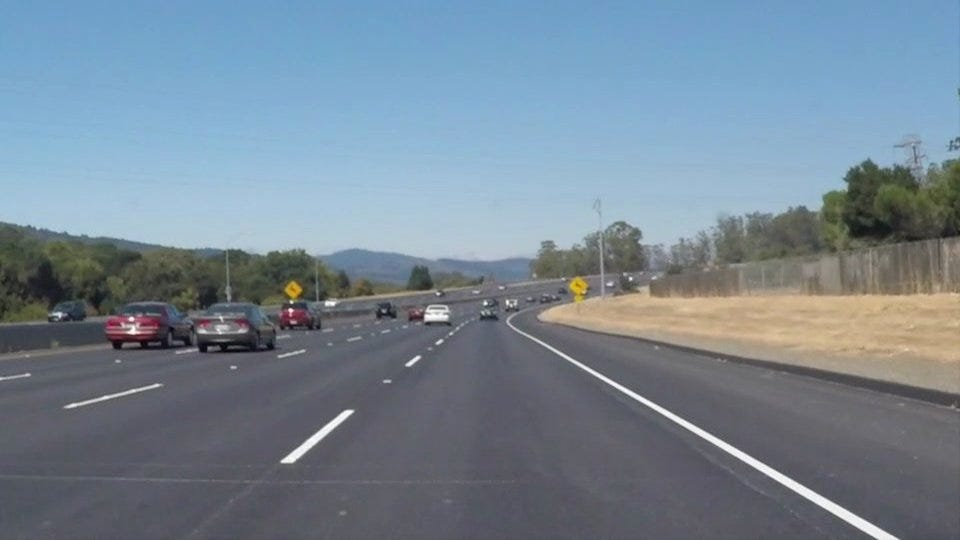

In [43]:
#Checking if the image is read properly or not
cv2_imshow(image)

***Step-3: Convert image to Grayscale***

In [44]:
'''
Converting the image into grayscale
Here we use the cvtColor() method in opencv
'''

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

***Step-4: Applying Gaussian Blur***

In [45]:
'''
Reduce the noise in the image using Gaussian blur
Here we use the GaussianBlur() method of opencv
'''

blur = cv2.GaussianBlur(gray,(5,5),0)

***Step-5: Edge Detection using Canny Algorithm***

In [46]:
'''
Edge detection is used to detect the edges of the lane markings
Here we use the Canny Edge Detection Algorithm
The opencv library consists of Canny() function
'''

edges = cv2.Canny(blur, 50, 150)

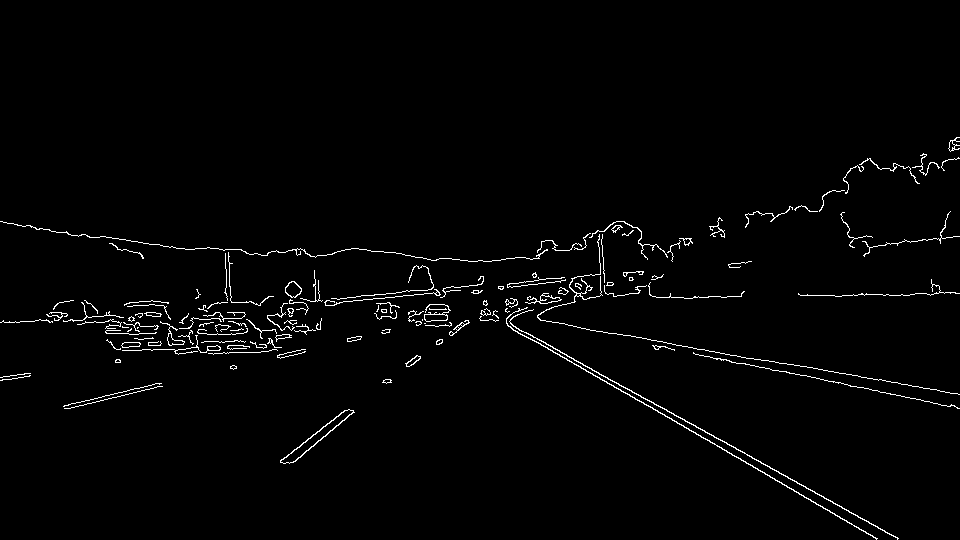

In [47]:
cv2_imshow(edges)

***Step-6: Defining Region of Intrest***

In [48]:
#Now we have to define Region of intrest i.e where the lanes are present in the image
mask=np.zeros_like(edges)

***Defining vertices of ROI and creating Mask***

In [49]:
'''
Here we mask the rest of the image to focus only on the region of interest (the part of the image which is required)
The fillpoly() function in opencv is used to create a mask
The bitwise_and() function in opencv is used to apply the mask to the image
'''

height,width = image.shape[:2]
roi_vertices = [(0, height), (width/2, height/2), (width, height)]
mask_color=255
cv2.fillPoly(mask, np.array([roi_vertices], dtype=np.int32), mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

***Step-7: Hough Tranform***

In [50]:
'''
Hough transform is used to detec the lines in the masked image
Here we use the HoughLinesP() function in opencv
'''

lines = cv2.HoughLinesP(masked_edges, rho=6, theta=np.pi/60, threshold=160, minLineLength=40, maxLineGap=25)
print(lines)

[[[701 437 876 539]]

 [[770 468 814 491]]

 [[629 389 698 428]]

 [[482 310 877 538]]

 [[484 309 537 339]]

 [[383 381 481 310]]

 [[666 409 761 463]]

 [[386 383 487 309]]

 [[724 441 833 503]]

 [[486 308 623 387]]

 [[292 462 354 412]]

 [[383 380 511 287]]

 [[769 466 869 523]]]


***Step-8: Drawing lines on image based on the lanes***

In [51]:
'''
Now we draw lines on the detected lanes on the original image
We use the line() function in opencv
'''

line_image = np.zeros_like(image)
for line in lines:
  x1, y1, x2, y2 = line[0]
  cv2.line(line_image, (x1,y1), (x2,y2), (0,255, 0), 5)

***Step-9: Overlaying lines on original image***

In [52]:
'''
The detected lines are overlayed on the original image
By using addWeighted() function in opencv
'''
final_image = cv2.addWeighted(image, 0.8, line_image, 1, 0)

***Step-10: Display the final result***

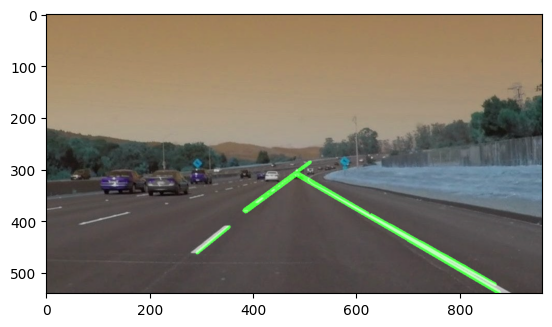

In [53]:
'''
Display the final result by using the imshow() function
Here we use matplotlib library to plot the image and display
'''

plt.imshow(final_image)
plt.show()